In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load and remove duplicate job listings based on 'jobId' from both JSON files
reed_df = pd.concat([
    pd.read_json('python_developer_reed_jobs.json'),
    pd.read_json('software_developer_reed_jobs.json')
]).drop_duplicates(subset=['jobId'])

# Load location data from CSV file and merge with job listings
location_df = pd.read_csv('location.csv')
reed_df = reed_df.merge(location_df[['latitude', 'longitude']], left_index=True, right_index=True)

# Convert job titles and descriptions to lowercase
reed_df[['jobTitle', 'jobDescription']] = reed_df[['jobTitle', 'jobDescription']].applymap(str.lower)


In [2]:
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut
# from time import sleep

# def get_coordinates_nominatim():
#     # Initialize the Nominatim geocoder with a user agent
#     app = Nominatim(user_agent='jobs')
    
#     # Get unique location names from the DataFrame
#     unique_locations = reed_df['locationName'].unique()
    
#     # Iterate over each unique location
#     for location in unique_locations:
#         # Check if the latitude for the location is missing
#         if reed_df.loc[reed_df['locationName'] == location, 'latitude'].isna().all():
#             try:
#                 # Attempt to geocode the location
#                 geocode_result = app.geocode(location)
#                 if geocode_result:
#                     # Extract latitude and longitude from the geocode result
#                     latitude, longitude = geocode_result.latitude, geocode_result.longitude
#                     print(location, latitude, longitude)
                    
#                     # Update the DataFrame with the obtained coordinates
#                     reed_df.loc[reed_df['locationName'] == location, 'latitude'] = latitude
#                     reed_df.loc[reed_df['locationName'] == location, 'longitude'] = longitude
                    
#                     # Save the updated DataFrame to a CSV file
#                     reed_df[['locationName', 'latitude', 'longitude']].to_csv('location.csv', index=False)
#             except GeocoderTimedOut:
#                 # Handle timeout exception by retrying after a delay
#                 print(f"Geocoding timed out for location: {location}. Retrying...")
#                 sleep(5)
#                 return get_coordinates_nominatim()
#             except Exception as e:
#                 # Handle any other exceptions and continue with the next location
#                 print(f"Error geocoding location {location}: {e}")
#                 continue

# # Call the function to start the geocoding process
# get_coordinates_nominatim()





In [3]:
# List of various technologies and tools used in software development,
#  data science, AI, and cybersecurity
technologies =['Python', 'Django', 'Flask', 'FastAPI', 'Pyramid', 'SQL',
       'PostgreSQL', 'MySQL', 'MongoDB', 'JavaScript', 'HTML5', 'CSS3',
       'REST APIs', 'GraphQL', 'AWS', 'Azure', 'Docker', 'Kubernetes',
       ' Git ', 'CI/CD', 'PyCharm', 'Jupyter', 'NumPy', 'Pandas',
       'TensorFlow', 'Keras', 'Scikit-learn', 'Artificial Intelligence',
       ' data ', 'pipeline AI ', 'Machine Learning', 'Deep Learning',
       'Neural Networks', 'Natural Language Processing', 'NLP', 'LLMs',
       'LLM', 'large Language Model', 'Computer Vision', 'Data Science',
       'Predictive Analytics', 'Algorithm Development', 'Automation',
       'Robotics', 'Cognitive Computing', 'Big Data', 'Data Mining',
       'PyTorch', 'Reinforcement Learning', 'Supervised Learning',
       'Unsupervised Learning', 'AI Ethics', 'AI Research',
       'Model Training', 'Model Deployment', 'AI Frameworks', 'AI Tools',
       'AI Solutions', 'HTML', 'CSS', 'React', 'Responsive Design',
       'UI/UX Design', ' UI ', 'Adobe XD', 'Figma', 'Sketch',
       'EmbeddingWireframing', 'Prototyping', 'User Research',
       'Visual Design', 'Typography', 'Color Theory', 'SEO',
       'Accessibility', 'Angular', 'Vue.js', 'Sass', 'Webpack', 'Babel',
       'TypeScript', 'Redux', 'Bootstrap', 'Tailwind CSS',
       'Cross-Browser Compatibility', 'Node.js', 'Express.js', 'Java ',
       'Spring Boot', 'Ruby on Rails', 'PHP', 'Laravel', 'C#', ' .NET ',
       'RESTful APIs', ' REST ', ' API ', ' APIs ', 'Authentication',
       'Authorization', 'Microservices', 'Cyber Security Analyst',
       'Cyber Security', 'Information Security Specialist',
       'Network Security Engineer', 'Penetration Tester',
       'Security Consultant', 'Security Operations Center (SOC) Analyst',
       'Incident Response Specialist', 'Cyber Threat Analyst',
       'Security Architect', 'Vulnerability Assessor',
       'Risk Management Specialist', 'Security Compliance Analyst',
       'Ethical Hacker', 'Digital Forensics Investigator',
       'Cloud Security Engineer', 'Application Security Engineer',
       'Identity and Access Management (IAM) Specialist',
       'Security Software Developer',
       'Chief Information Security Officer (CISO)',
       'Security Awareness Trainer', 'Cyber', 'backend', 'frontend',
       'Apache Spark', 'Hadoop', 'Kafka', 'Airflow', 'Informatica',
       'Talend', 'Snowflake', 'Redshift', 'Scala', 'Java', 'Tableau',
       'Power BI', '.NET Framework', 'ASP.NET', 'Entity Framework',
       'LINQ', 'Visual Studio', 'Xamarin',
       'WPF (Windows Presentation Foundation)',
       'WCF (Windows Communication Foundation)', 'SQL Server', 'NuGet',
       'ReSharper', 'DevOps', 'Cloud', 'Solutions Architect',
       'Security', 'Data Engineer',
       'AI Engineer', 'Kubernetes Service (AKS)', 'lambda functions',
       'Logic Apps', 'Synapse Analytics', 'Active Directory',
       'Virtual Machines', 'Storage', 'Networking', 'SQL Database',
       'Cosmos DB', 'Site Recovery', 'Backup', 'Policy',
       'Resource Manager', 'Service Fabric', 'Event Hubs', 'IoT Hub',' IoT '
       'Cognitive Services', 'EC2', 'S3', 'CloudFront', 'ElastiCache',
       'S3 Glacier', 'SageMaker', ' RDS ', ' IAM ', ' EBS ', 'Lambda', ' EFS ',
       'SNS', 'VPC', 'AWS Auto-Scaling', 'SQS', 'Elastic Beanstalk',
       'DynamoDB', 'Cloud Directory', 'Cognito', 'Inspector', 'Aurora',
       'CloudWatch', 'AWS Firewall Manager', 'AWS KMS', 'LightSail',' Web ']



In [4]:
# Create a DataFrame to store the frequency of technology words
frecuency_tech_words = pd.DataFrame(0, index=technologies, columns=technologies)

# Convert job descriptions to lowercase once
reed_df['jobDescription'] = reed_df['jobDescription'].str.lower()

# Create a dictionary to store the presence of each technology word in job descriptions
word_presence = {word: reed_df['jobDescription'].str.contains(word.lower()) for word in technologies}

# Iterate over each pair of technology words
for word_column in technologies:
    for word_row in technologies:
        # Count the number of job descriptions that contain both technology words
        num_true = (word_presence[word_column] & word_presence[word_row]).sum()
        # Store the count in the DataFrame
        frecuency_tech_words.loc[word_row, word_column] = num_true


/tmp/ipykernel_422/600063604.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  word_presence = {word: reed_df['jobDescription'].str.contains(word.lower()) for word in technologies}


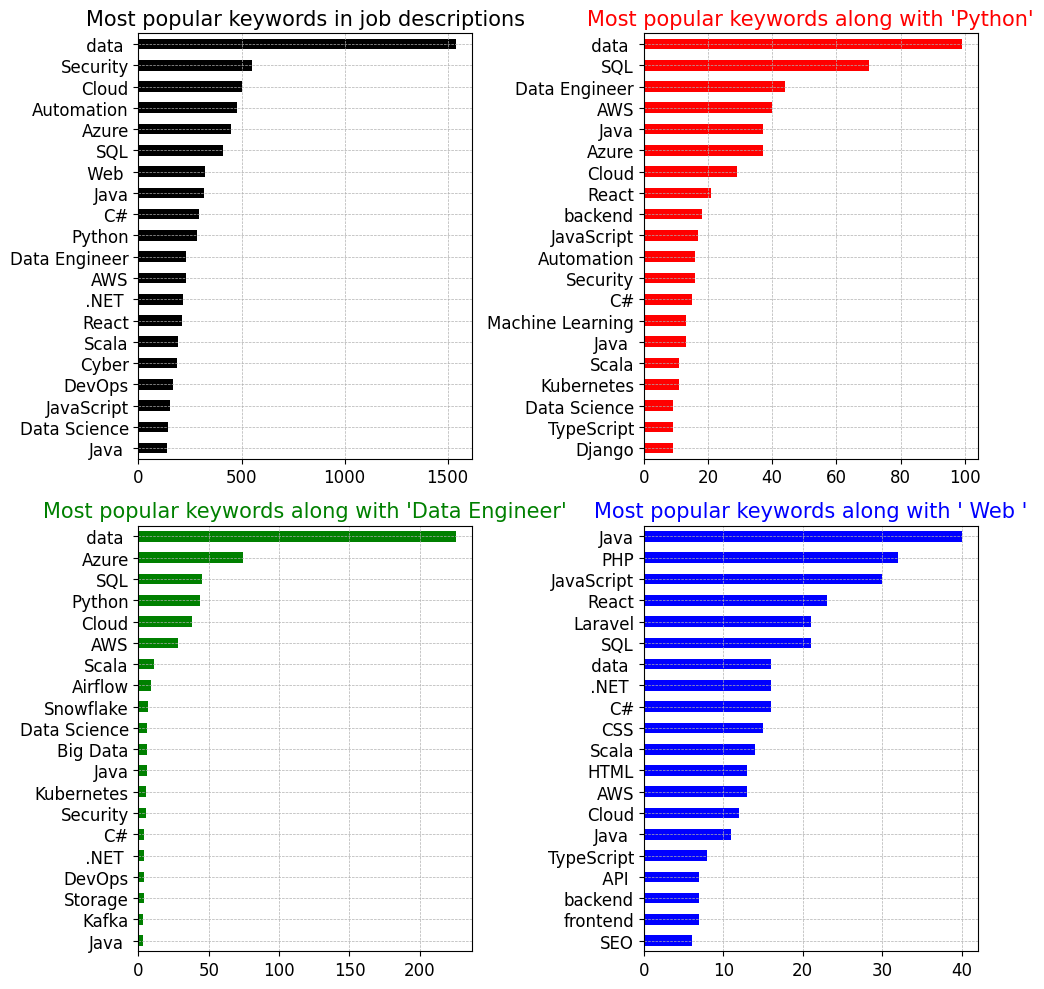

In [5]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

x_y_label_size=12
title_size=15

# Plot the most popular keywords in job descriptions
frecuency_tech_words.max().sort_values(ascending=False).head(20).plot(kind='barh', ax=ax[0, 0],color='black')
ax[0, 0].set_title("Most popular keywords in job descriptions", fontsize=title_size)
ax[0, 0].tick_params(axis='y', labelsize=x_y_label_size)
ax[0, 0].tick_params(axis='x', labelsize=x_y_label_size)
ax[0, 0].invert_yaxis()
ax[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Define keywords, axes, and colors
keywords = ['Python', 'Data Engineer', ' Web ']
axes = [ax[0, 1], ax[1, 0], ax[1, 1]]
colors = ['r', 'g', 'b']

# Plot the most popular keywords in job descriptions that also include specific keywords
for keyword, axis, color in zip(keywords, axes, colors):
    frecuency_tech_words[keyword].sort_values(ascending=False).head(21)[1:].plot(kind='barh', ax=axis, color=color)
    axis.set_title(f"Most popular keywords along with '{keyword}'", fontsize=title_size,color=color)
    axis.tick_params(axis='y', labelsize=x_y_label_size)
    axis.tick_params(axis='x', labelsize=x_y_label_size)
    axis.invert_yaxis()
    axis.grid(True, which='both', linestyle='--', linewidth=0.5)
    
# Adjust layout
plt.tight_layout()
plt.show()



/tmp/ipykernel_422/3921342861.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  juniors=reed_df[reed_df['jobTitle'].str.lower().str.contains(pat=f"(entry|junior|graduate|apprentice).*{keyword}",regex=True)]['date'].value_counts().sort_index()


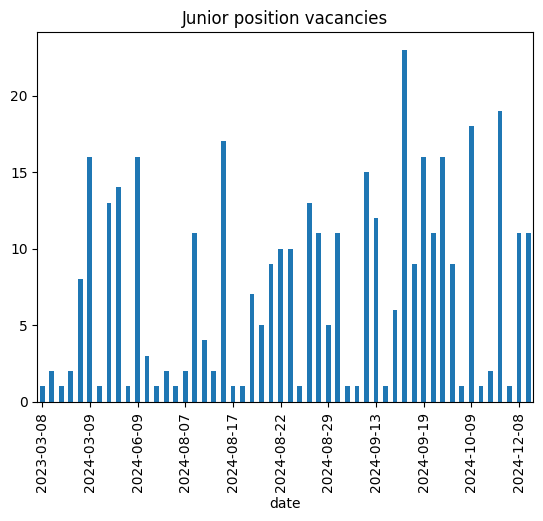

In [6]:
keyword=''
reed_df['expirationDate']=pd.to_datetime(reed_df['expirationDate'],format="%d/%m/%Y")
reed_df['date']=pd.to_datetime(reed_df['date'],format="%d-%m-%Y")
juniors=reed_df[reed_df['jobTitle'].str.lower().str.contains(pat=f"(entry|junior|graduate|apprentice).*{keyword}",regex=True)]['date'].value_counts().sort_index()
juniors.plot(kind='bar')
plt.xticks(ticks=range(0,juniors.shape[0],5),labels=juniors.index.map(lambda x:x.date)[::5])
plt.title("Junior position vacancies")
plt.show()

In [7]:
def junior_vacancies_bar_plot(technology_keyword=''):
    # Filter the DataFrame for job titles containing 'junior', 'entry', or 'graduate' and the technology keyword
    reed_df['jobTitle']=reed_df['jobTitle'].str.lower()
    technology_keyword=technology_keyword.lower()
    juniors = (
        reed_df[reed_df['jobTitle']
                .apply(lambda df: True if (('junior' or 'entry' or 'graduate') and technology_keyword) in df else False)]
        ['expirationDate']
        .value_counts()
    )
    
    # Convert the index to datetime format
    juniors.index = pd.to_datetime(juniors.index, format="%d/%m/%Y")
    
    # Create a bar plot of the number of vacancies by date
    sns.barplot(data=juniors.sort_index())
    
    # Rotate the x-axis labels for better readability
    plt.xticks(range(0, len(juniors), 5), rotation=90) 
    
    # Set the title and labels of the plot
    plt.title(f"Junior position vacancies with '{technology_keyword}'")
    plt.ylabel("Number of vacancies published daily")
    plt.xlabel("Day")
    
    # Display the plot
    plt.show()



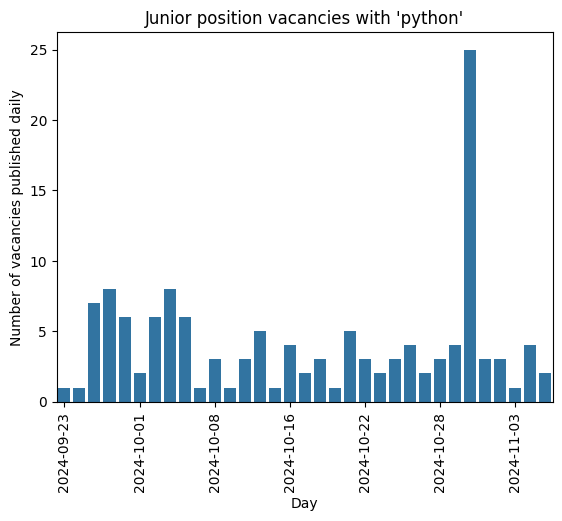

In [8]:
junior_vacancies_bar_plot(technology_keyword='Python')

In [9]:
def plot_salary_dist(df, salary, title):
    # Filter the DataFrame to include only rows where 'salary' is not null and greater than 10000
    data = df[df[salary].gt(10000)]
    
    # Create a distribution plot for the 'salary' column
    sns.displot(data=data, x=salary)
    
    # Set the x-axis ticks from 0 to 150000 with an interval of 10000 and rotate the labels by 90 degrees
    plt.xticks(range(0, 150000, 10000), rotation=90)
    
    # Set the x-axis limit from 0 to 150000
    plt.xlim(0, 150000)
    
    # Draw a vertical line at the median value of the 'salary' column
    median_salary = data[salary].median()
    plt.axvline(x=median_salary, color='r', linestyle='--')

    # Add text at the position (1.1 * median, y_median_pos) displaying the median value
    y_median_pos=data[salary].value_counts().max()
    plt.text(x=1.1 * data[salary].median(), y=y_median_pos, s=f"median={data[salary].median()}", color='r')
    
    # Set the title of the plot
    plt.title(title)
    
    # Display the plot
    plt.show()


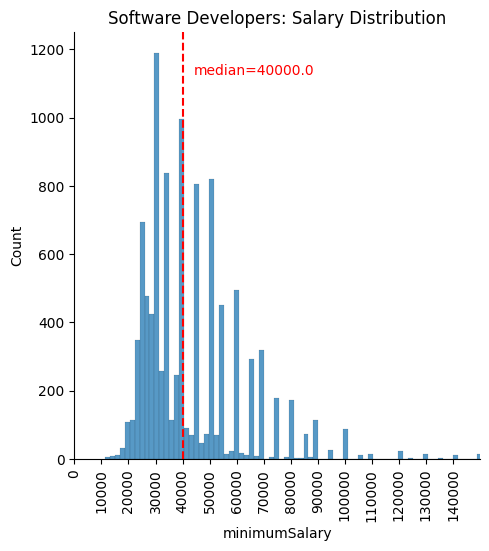

In [10]:
plot_salary_dist(reed_df,'minimumSalary',title="Software Developers: Salary Distribution")

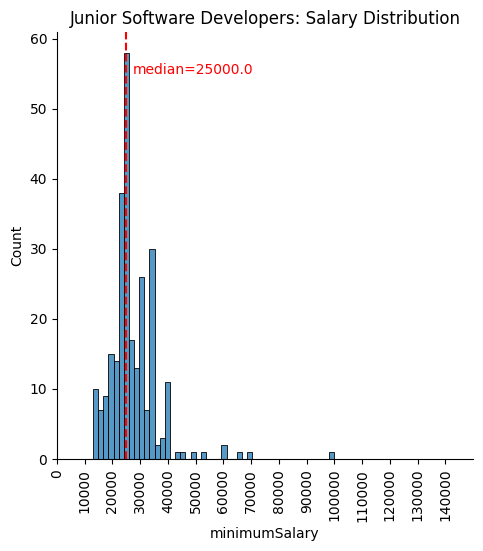

In [11]:
plot_salary_dist(
    reed_df[reed_df['jobTitle'].str.lower().str.contains(pat=r"junior|entry|graduate|apprentice",regex=True)]
    ,"minimumSalary"
    ,title="Junior Software Developers: Salary Distribution"
)

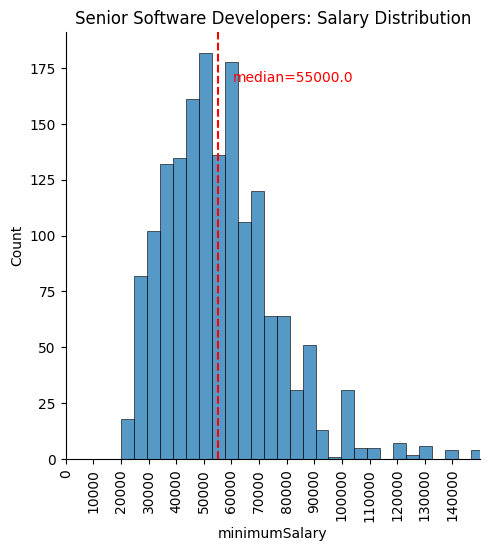

In [12]:
plot_salary_dist(
    (reed_df[reed_df['jobTitle'].str.lower().str.contains(pat=r"senior|principal|semi-senior|lead",regex=True)])
    ,"minimumSalary"
    ,title="Senior Software Developers: Salary Distribution"
)

In [42]:
from ipywidgets import widgets, interact,HBox
from IPython.display import display
import plotly.graph_objects as go

def create_scatter_map_with_color_scaled_clusters(df,keyword=''):
    # Create a continuous color scale
    colorscale = px.colors.sequential.Viridis

    

    df=df[df['jobTitle'].str.contains(pat=r"{}".format(keyword).lower(),regex=True)]
    fig=px.scatter_map(data_frame=df,lat='latitude',lon='longitude',hover_name='jobTitle')
    fig.update_layout(
            map=dict(
                style="open-street-map",
                zoom=4,
                center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean())
            ),
            showlegend=False,
            height=600,
            margin=dict(l=0, r=0, t=0, b=0)
        )
    
    # Define cluster steps and corresponding colors
    steps = [0, 10, 50, 100, 500, 1000,5000,10000]
    colors = [colorscale[int(i)] for i in np.linspace(0, len(colorscale)-1, len(steps))]

    # Enable clustering with color steps
    fig.update_traces(
            cluster=dict(
                enabled=True,
                step=steps,
                color=colors,
                opacity=0.7,
                size=list(range(10,35,5)),  # Increase size with cluster size
                maxzoom=15,
            )
        )
    
    fig.show(renderer='notebook')

# Create a text box widget for keyword input
keyword_widget = widgets.Text(
    value='',
    placeholder='Type a keyword to filter jobs',
    description='Keyword:',
    disabled=False
)

# Display the widget and update the plot based on the input
def update_plot(keyword):
    create_scatter_map_with_color_scaled_clusters(reed_df, keyword)


interact(update_plot, keyword=keyword_widget)



interactive(children=(Text(value='', description='Keyword:', placeholder='Type a keyword to filter jobs'), Out…

<function __main__.update_plot(keyword)>

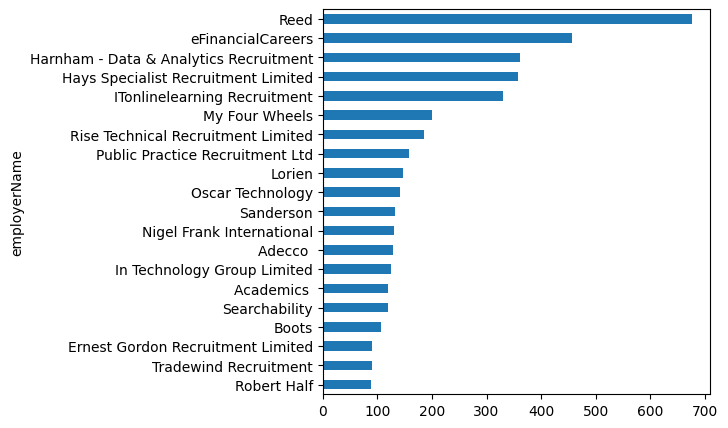

In [14]:
reed_df['employerName'].value_counts().head(20).plot(kind='barh',figsize=(5,5))
plt.gca().invert_yaxis()

In [15]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Create a SelectMultiple widget
job_list = widgets.SelectMultiple(
    options=reed_df['jobTitle'].unique(),
    description='Jobs:',
    disabled=False,
    layout=widgets.Layout(width='50%', height='800px')
)

# Display the dropdown
display(job_list)

# Function to display selected job
def display_job(change):
    print(f"Selected job: {change['new']}")

# Link the dropdown to the display function
job_list.observe(display_job, names='value')


SelectMultiple(description='Jobs:', layout=Layout(height='800px', width='50%'), options=('python developer ', …